## Projet 9 : Produisez une étude de marché avec R ou Python

## Notebook 2 :  Analyse des Clusterings et  visualisations

> 1. La Méthode de Classification Ascendante Hiérarchique (CAH) avec le Dendrogramme de Visualisation

> 2. L’analyse par la Méthode des k-means

> 3. Comparaison des Résultats des deux Méthodes de Clustering 

> 4. L'analyse des Centroïdes des Classes

> 5. Réaliser une ACP pour comprendre les groupes, les liens entre les variables et les liens entre les pays


## Sommaire :
 
### Partie 2:  Analyse des Clusterings et  Visualisations

#### [1. La Méthode de Classification Ascendante Hiérarchique (CAH) avec le Dendrogramme de Visualisation](#B1)


#### [2. L’analyse par la Méthode des k-means](#B2)

#### [3. Comparaison des Résultats des deux Méthodes de Clustering](#B3)

#### [4. Analyse des Centroïdes des Classes](#B4)

#### [5. Réaliser une ACP pour comprendre les groupes, les liens entre les variables et les liens entre les pays](#B5)

### Chargement des données du notebook 1

In [1]:
%run AKUE_MENDOU_Dalience_1_preparation_nettoyage_analyse_exploratoire_042023.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zone                   172 non-null    object 
 1   dispo_alim_kg/pers/an  172 non-null    float64
 2   Production             168 non-null    float64
 3   Importations           170 non-null    float64
 4   Nourriture             170 non-null    float64
dtypes: float64(4), object(1)
memory usage: 6.8+ KB
Il n'y a pas de doublons dans la table disponibilite.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   Population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #

## Partie 2:  Analyse des Méthodes de Clustering et  Visualisations

### <a id="B1">1. La Méthode de Classification Ascendante Hiérarchique (CAH) avec le Dendrogramme de Visualisation</a>

In [2]:
# Sélectionner les variables numériques pour l'analyse
X_cols = ['dispo_alim_kg/pers/an', 'Production', 'Importations', 'Nourriture', 'Population', 'Population rurale', 
          'Population urbaine', 'PIB par Habitant', 'Taux de croissance', 'Indice de Stabilité Politique']

X = data_etude[X_cols]
X.head()

,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,PIB par Habitant,Taux de croissance,Indice de Stabilité Politique
0,1.53,28.0,29.0,55.0,36296113,26558609,8971472,530.15,1.90,-2.80
1,35.69,1667.0,514.0,2035.0,57009756,19369002,37348154,6723.93,17.25,-0.28
2,16.36,13.0,38.0,47.0,2884169,1190155,1740032,4521.75,9.83,0.38
3,6.38,275.0,2.0,264.0,41389189,11547532,29770610,4134.94,4.23,-0.92
4,19.47,1514.0,842.0,1609.0,82658409,18672100,63442124,44670.22,6.06,0.59


> Les **variables ont des échelles et unités différentes**. Par conséquent, il est important de **normaliser les données** pour garantir que chaque variable contribue de manière équivalente à l'analyse.

- ### Choix de la Normalisation des données
> Pour choisir la méthode de normalisation, nous testons le différentes normalisations avec les dendrogrammes correspondants.

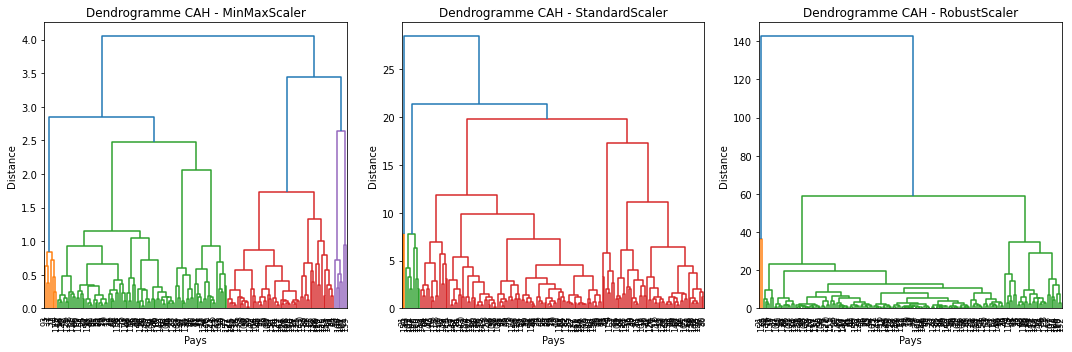

In [3]:
# Créer une liste des noms des normalisations à tester
scalers = ['MinMaxScaler', 'StandardScaler', 'RobustScaler']

# Créer une figure pour le dendrogramme
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Boucle pour générer les dendrogrammes pour chaque normalisation
for i, scaler_name in enumerate(scalers):
    
    # Normaliser les données
    scaler = eval(scaler_name)()
    X_scaled = scaler.fit_transform(X)
    
    # Appliquer la CAH
    Z = linkage(X_scaled, method='ward')
    
    # Afficher le dendrogramme
    dendrogram(Z, ax=axs[i], orientation='top', leaf_rotation=90., leaf_font_size=8., truncate_mode='level')
    
    # Titre et label pour chaque dendrogramme
    axs[i].set_title('Dendrogramme CAH - ' + scaler_name)
    axs[i].set_xlabel('Pays')
    axs[i].set_ylabel('Distance')
    
# Afficher la figure
plt.tight_layout()
plt.show()

> La Méthode de normalisation **MinMaxScaler est la plus équilibrée** pour la classification de nos données. Elle permet de ramener nos variables à la même échelle entre 0 et 1.

- ### Visualisation du Dendrogramme de la Classification Ascendante Hiérarchique

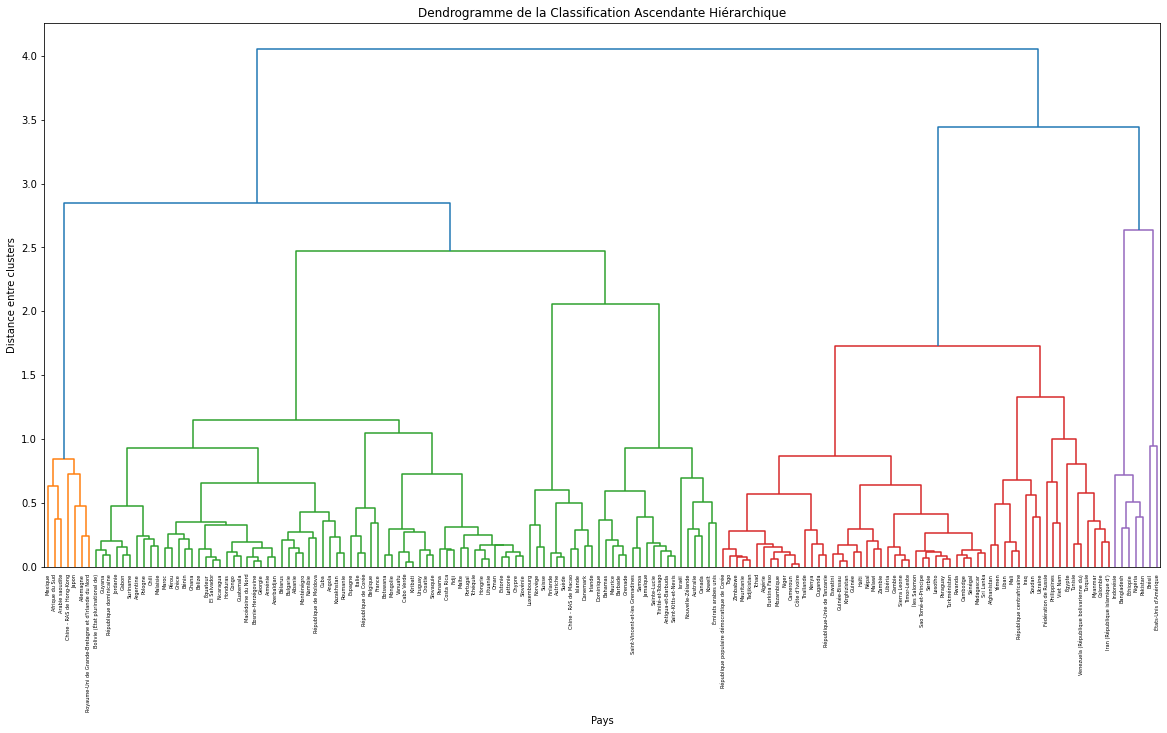

In [4]:
# Effectuer la normalisation avec MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Effectuer une CAH avec la méthode ward
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Afficher le dendrogramme
plt.figure(figsize=(20, 10))
plt.title("Dendrogramme de la Classification Ascendante Hiérarchique")
dendrogram(Z, labels=data_etude['Zone'].values, leaf_rotation=90)
plt.xlabel('Pays')
plt.ylabel('Distance entre clusters')
plt.show()

>Le Dendrogramme de la CAH permet d'identifier les **4 derniers groupes de pays** qu'on peut analyser.

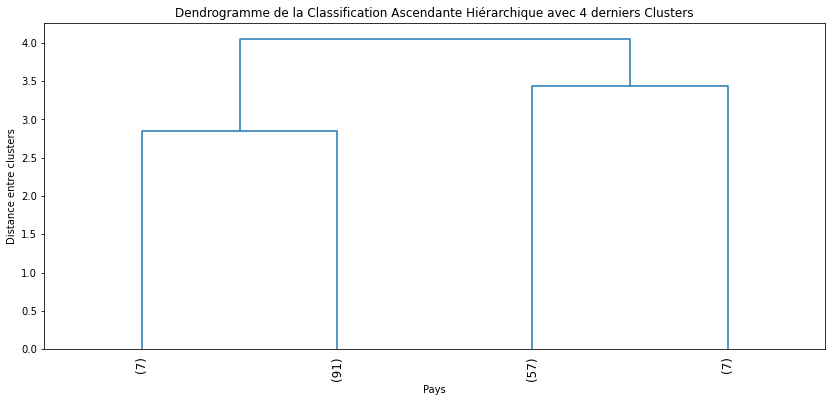

Cluster 1: 7 pays
['Bangladesh', 'Brésil', 'Indonésie', 'Nigéria', 'Pakistan', "États-Unis d'Amérique", 'Éthiopie']


Cluster 2: 91 pays
['Albanie', 'Angola', 'Antigua-et-Barbuda', 'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Barbade', 'Belgique', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Bélarus', 'Bénin', 'Cabo Verde', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Fidji', 'Finlande', 'France', 'Gabon', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guyana', 'Géorgie', 'Honduras', 'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Kiribati', 'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Malaisie', 'Malte', 'Maroc', 'Maurice', 'Mongolie', 'Monténégro', 'Namibie', 'Nicaragua', 'Norvège', 'Nouvelle-Zélande', 'Oman', 'Panama', 'Pologne', '

In [5]:
# Dendrogramme avec 4 derniers Clusters
plt.figure(figsize=(14, 6))
plt.title("Dendrogramme de la Classification Ascendante Hiérarchique avec 4 derniers Clusters")
dendrogram(Z, labels=data_etude['Zone'].values, leaf_rotation=90, p=4, truncate_mode="lastp")
plt.xlabel('Pays')
plt.ylabel('Distance entre clusters')
plt.show()

# CAH avec 4 clusters
cah = AgglomerativeClustering(n_clusters=4, linkage='ward')
cah.fit(X_scaled)

# Affichage des pays de chaque cluster
for i in range(4):
    cluster_size = sum(cah.labels_ == i)
    print(f'Cluster {i+1}: {cluster_size} pays')
    print(data_etude['Zone'][cah.labels_ == i].tolist())
    print('\n')

### Observations:
>- La Méthode de **CAH** a permis de **regrouper les pays** ayant des **caractéristiques similaires** ou qui sont les plus corrélés. 

>- Le **Dendrogramme** obtenu permet de **visualiser les liens entre les différents pays** étudiés et d'identifier les **4 derniers groupes formés** à partir des données. 

>- **On peut choisir le nombre de clusters** à étudier en coupant à plusieurs niveaux possibles dans le dendrogramme en fonction de la distance eucludienne (distance entre clusters). Mais **cette méthode ne donne pas le nombre de clusters optimal**.

### <a id="B2">2. L’analyse par la Méthode des k-means</a>

> Cette **Méthode** permet de **regrouper les pays en clusters** en fonction de leurs **similitudes et de leurs différences**, afin d'**identifier des segments de marché potentiels** pour l'entreprise. Les caractéristiques étudiées permettent d'identifier des **opportunités de croissance et des défis potentiels** pour l'entreprise sur les marchés cibles. Contrairement à la CAH, la **Méthode des K-Means** nécessite de déterminer au préalable le **nombre de clusters optimal**.

- ### Détermination du nombre de clusters optimal

Pour déterminer le nombre de clusters optimal, nous comparons deux méthodes: Coude et Silhouette.

> La **Méthode de Coude** permet de **déterminer le nombre optimal de clusters** en traçant la variance expliquée par rapport au nombre de clusters. Le coude correspond à un point où l'ajout d'un cluster supplémentaire ne diminue plus significativement la variance expliquée. La fonction **KneeLocator() est utilisée pour détecter le coude** dans la courbe décroissante de l'inertie.

> La **Méthode de Silhouette** est une autre méthode d'évaluation de la qualité de clustering qui vise à minimiser la distance intra-cluster et à maximiser la distance inter-cluster. Plus le **score de Silhouette est élevé, meilleure est la partition**.

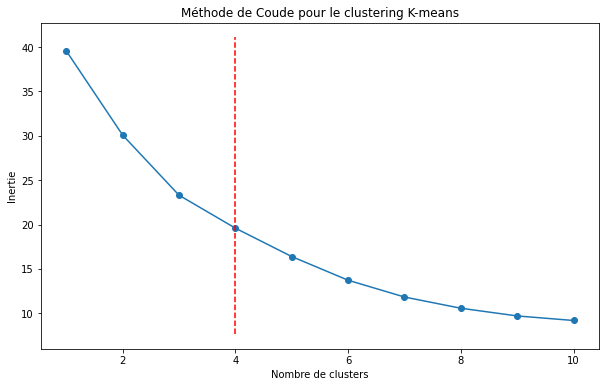

Le nombre optimal de clusters de Coude est: 4


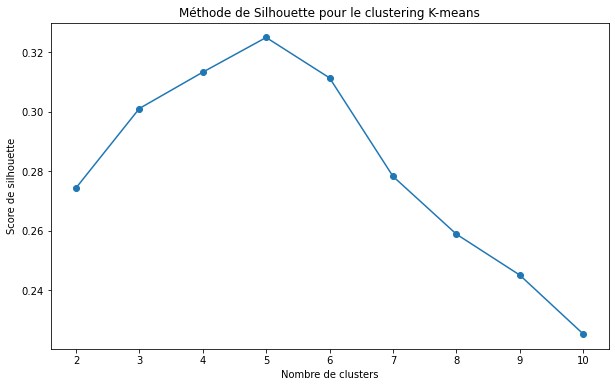

Le nombre optimal de clusters de Silhouette est: 5


In [6]:
# Méthode du Coude
from kneed import KneeLocator
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer le graphique de coude
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode de Coude pour le clustering K-means')

# Utilisation de KneeLocator pour déterminer le nombre de clusters optimal
kl = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='r')
plt.show()

# Afficher le nombre de clusters optimal
print(f"Le nombre optimal de clusters de Coude est: {kl.elbow}")

# Méthode de silhouette
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    sil_scores.append(sil_score)

# Tracer le graphique de silhouette
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Méthode de Silhouette pour le clustering K-means')
plt.show()

# Affichage du nombre de clusters optimal
best_k_sil = np.argmax(sil_scores) + 2
print(f"Le nombre optimal de clusters de Silhouette est: {best_k_sil}")

> Les résultats de la méthode du coude et de la méthode de silhouette donnent des nombres de clusters différents. Cela peut être dû au fait que **la méthode du coude** est basée sur l'inertie totale qui **ne mesure que la cohérence des points dans chaque cluster**, sans prendre en compte la distance entre les clusters. D'autre part, **la méthode de silhouette** mesure à la fois la **cohérence des points dans chaque cluster et la distance entre les clusters**, ce qui peut expliquer pourquoi elle donne un nombre de clusters différent.

> Dans notre cas, nous choisissons d'utiliser **5 clusters**, car cela a été suggéré par **la méthode de silhouette** pour garantir à la fois **l'homogénéité** et la **séparation** des clusters.

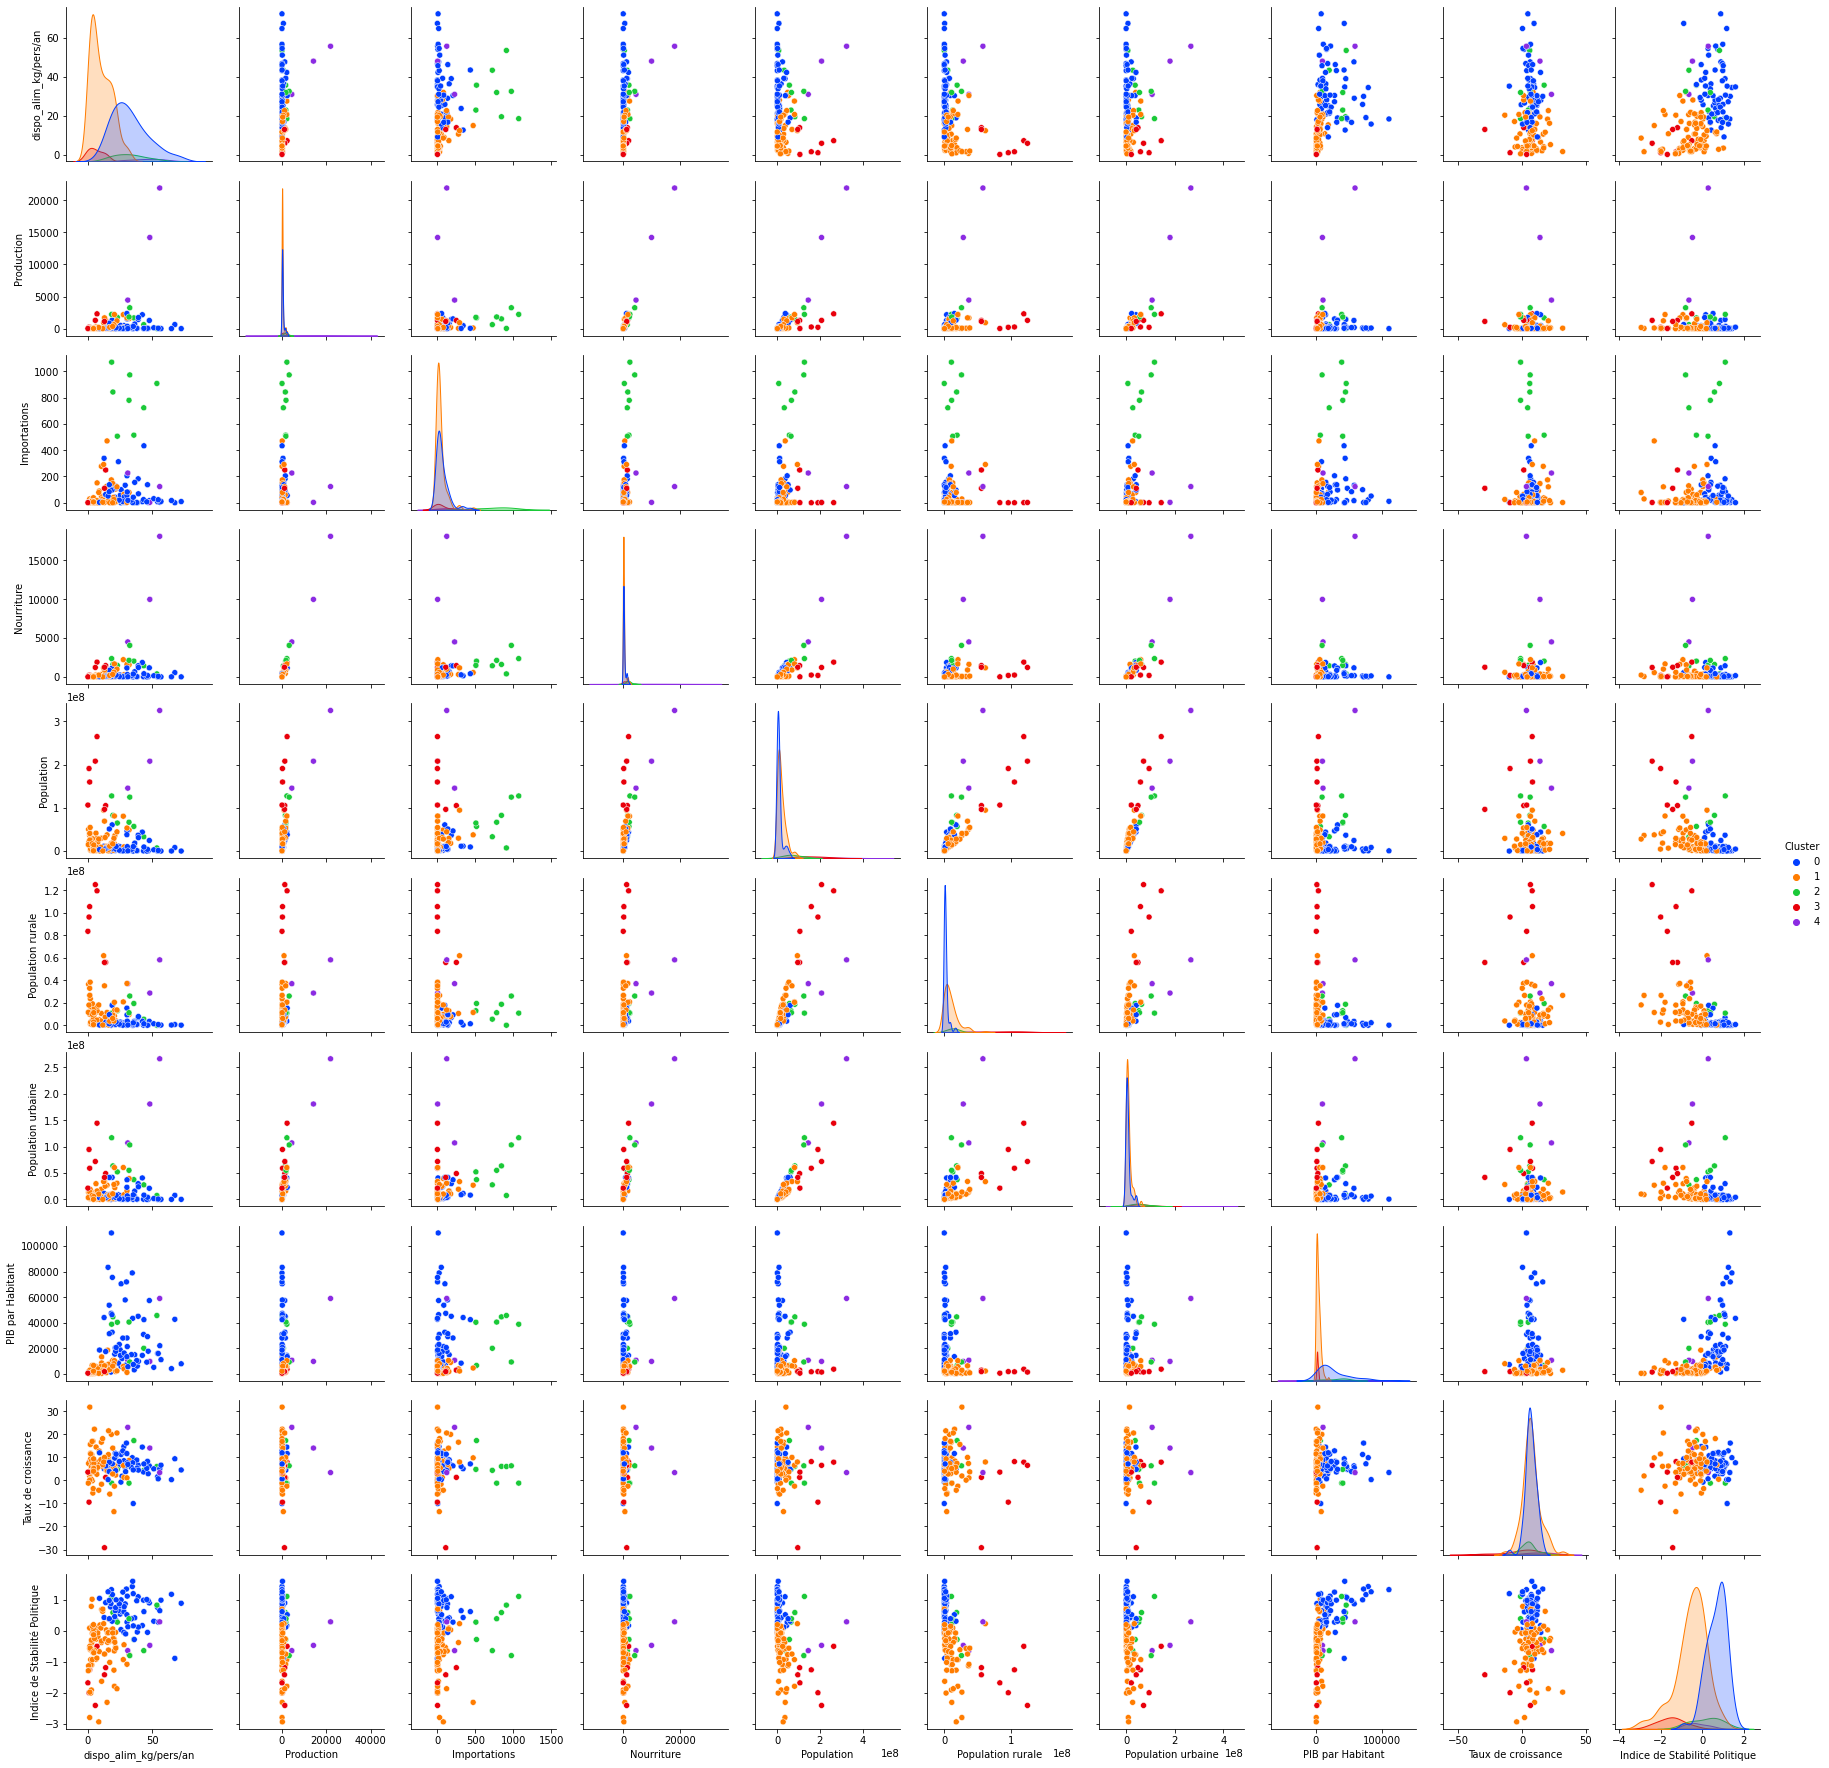

In [7]:
# Application de la méthode des K-means avec le nombre optimal de clusters: 5
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Ajout des labels de cluster au DataFrame original
data_etude['Cluster'] = labels

# Définir une palette de couleurs
palette = sns.color_palette("bright", 5)

# Utiliser le pairplot pour visualiser les relations entre les variables avec les clusters de K-means
sns.pairplot(data_etude, hue='Cluster',  palette=palette, vars=X)
plt.show()

> **Population urbaine et nourriture** : Nous pouvons constater une relation positive entre la population urbaine et la consommation de nourriture. Cela suggère que les pays ayant une plus grande population urbaine ont tendance à avoir une consommation de nourriture plus élevée.

> **PIB par habitant et importations** : Nous pouvons observer une relation positive entre le PIB par habitant et les importations. Cela indique que les pays ayant un PIB plus élevé ont tendance à effectuer davantage d'importations.

> **Population rurale et population** : Nous pouvons remarquer une relation négative entre la population rurale et la population totale d'un pays. Cela suggère que lorsque la population rurale augmente, la population totale du pays a tendance à diminuer.

> **Nourriture et importations** : Nous pouvons observer une relation positive entre la consommation de nourriture et les importations. Cela suggère que les pays ayant une consommation de nourriture plus élevée ont également tendance à effectuer davantage d'importations.

Ces observations nous permettent de mieux comprendre les relations entre les variables discriminantes et d'identifier les schémas et les tendances dans les données. Elles soulignent l'importance de ces variables dans la caractérisation des clusters et mettent en évidence les relations économiques et démographiques entre les pays étudiés.

In [8]:
# Afficher les statistiques descriptives de chaque cluster
for i in range(5):
    print(f'Statistiques descriptives pour le cluster {i}:')
    display(data_etude[data_etude['Cluster'] == i].describe())
    print()

Statistiques descriptives pour le cluster 0:


,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,Indice de Stabilité Politique,Taux de croissance,PIB par Habitant,Cluster
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,62.00000,62.000000,62.000000,62.0
mean,32.453065,309.596774,60.209677,271.903226,9.099588e+06,2.026859e+06,7.055757e+06,0.67629,6.636129,26381.512581,0.0
std,14.124105,543.245664,85.923553,426.223474,1.380039e+07,3.401849e+06,1.078466e+07,0.47615,4.254051,23689.631403,0.0
min,9.120000,0.000000,0.000000,2.000000,5.204500e+04,0.000000e+00,1.703100e+04,-0.89000,-10.060000,1563.470000,0.0
25%,21.712500,10.000000,7.250000,18.750000,5.995788e+05,1.901875e+05,4.316882e+05,0.34500,4.502500,8734.837500,0.0
50%,29.640000,71.500000,21.000000,102.000000,4.386348e+06,7.553300e+05,3.144766e+06,0.76000,6.280000,17693.575000,0.0
75%,39.162500,310.000000,83.500000,259.500000,9.861128e+06,2.249928e+06,7.671466e+06,1.00000,8.885000,40065.387500,0.0
max,72.310000,2351.000000,433.000000,1856.000000,6.067370e+07,1.772259e+07,4.163731e+07,1.60000,16.170000,110203.010000,0.0



Statistiques descriptives pour le cluster 1:


,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,Indice de Stabilité Politique,Taux de croissance,PIB par Habitant,Cluster
count,82.000000,82.000000,82.000000,82.000000,8.200000e+01,8.200000e+01,8.200000e+01,82.000000,82.000000,82.000000,82.0
mean,10.320732,234.853659,39.036585,229.524390,1.938781e+07,9.839467e+06,9.726476e+06,-0.532317,6.916463,3446.900244,1.0
std,8.015194,487.923343,73.978717,419.535611,2.001902e+07,1.113711e+07,1.206655e+07,0.757097,6.880641,3272.697001,0.0
min,0.450000,0.000000,0.000000,2.000000,2.070890e+05,5.727600e+04,6.951100e+04,-2.940000,-13.570000,414.740000,1.0
25%,3.397500,11.500000,2.000000,34.750000,4.622574e+06,1.829017e+06,2.292258e+06,-0.910000,3.560000,978.427500,1.0
50%,8.230000,56.000000,11.500000,63.500000,1.202424e+07,6.277007e+06,5.279762e+06,-0.380000,6.545000,2331.690000,1.0
75%,16.120000,161.750000,37.750000,202.500000,2.778428e+07,1.272523e+07,1.060699e+07,-0.050000,9.657500,4674.330000,1.0
max,31.990000,2192.000000,470.000000,2220.000000,9.460065e+07,6.189830e+07,6.038019e+07,1.020000,31.770000,18690.620000,1.0



Statistiques descriptives pour le cluster 2:


,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,Indice de Stabilité Politique,Taux de croissance,PIB par Habitant,Cluster
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.00000,8.00000,8.0
mean,32.236250,1606.125000,788.875000,1937.875000,7.049071e+07,1.303332e+07,5.783460e+07,0.185000,5.28625,30838.61750,2.0
std,12.113948,973.164123,203.162453,1047.307219,4.134092e+07,8.254706e+06,3.679143e+07,0.692181,5.74260,16129.24505,0.0
min,18.500000,24.000000,506.000000,391.000000,7.306322e+06,0.000000e+00,7.364883e+06,-0.800000,-1.22000,6723.93000,2.0
25%,22.042500,1289.500000,670.000000,1472.500000,5.103261e+07,9.442028e+06,3.489702e+07,-0.370000,2.95500,17462.20750,2.0
50%,32.230000,1708.500000,810.500000,1822.000000,6.578498e+07,1.201759e+07,5.356298e+07,0.335000,5.38000,39693.55000,2.0
75%,37.607500,1914.250000,923.250000,2188.000000,9.318814e+07,1.884633e+07,7.337128e+07,0.650000,6.12000,41630.81500,2.0
max,53.510000,3249.000000,1069.000000,4058.000000,1.275027e+08,2.600452e+07,1.166933e+08,1.110000,17.25000,45737.48000,2.0



Statistiques descriptives pour le cluster 3:


,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,Indice de Stabilité Politique,Taux de croissance,PIB par Habitant,Cluster
count,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.0
mean,6.074286,919.428571,51.857143,896.714286,1.615902e+08,9.176783e+07,6.880247e+07,-1.494286,-1.612857,2118.562857,3.0
std,5.647751,815.334871,95.988591,737.778809,6.337837e+07,2.813306e+07,4.051644e+07,0.615138,13.602873,1029.835590,0.0
min,0.130000,14.000000,0.000000,14.000000,9.644259e+07,5.589341e+07,2.131686e+07,-2.410000,-29.220000,709.760000,3.0
25%,1.255000,225.000000,0.500000,216.000000,1.057864e+08,6.979019e+07,4.531902e+07,-1.840000,-4.085000,1672.020000,3.0
50%,5.860000,1118.000000,1.000000,1218.000000,1.596854e+08,9.636130e+07,5.904682e+07,-1.420000,3.570000,1917.050000,3.0
75%,10.075000,1276.500000,56.000000,1354.500000,1.993897e+08,1.126597e+08,8.316036e+07,-1.225000,7.200000,2509.650000,3.0
max,13.870000,2301.000000,249.000000,1904.000000,2.646510e+08,1.252203e+08,1.442949e+08,-0.500000,8.130000,3839.790000,3.0



Statistiques descriptives pour le cluster 4:


,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,Indice de Stabilité Politique,Taux de croissance,PIB par Habitant,Cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000,3.0
mean,44.896667,13519.666667,117.333333,10863.666667,2.261496e+08,4.129583e+07,1.846167e+08,-0.273333,13.460000,26593.030000,4.0
std,12.644597,8754.906415,111.607945,6838.261646,9.116781e+07,1.523816e+07,7.971011e+07,0.495210,9.826551,28120.686653,0.0
min,30.980000,4444.000000,3.000000,4509.000000,1.455301e+08,2.865441e+07,1.069726e+08,-0.640000,3.370000,9896.720000,4.0
25%,39.505000,9322.500000,63.000000,7245.500000,1.766820e+08,3.283577e+07,1.438032e+08,-0.555000,8.690000,10359.745000,4.0
50%,48.030000,14201.000000,123.000000,9982.000000,2.078338e+08,3.701713e+07,1.806339e+08,-0.470000,14.010000,10822.770000,4.0
75%,51.855000,18057.500000,174.500000,14041.000000,2.664593e+08,4.761654e+07,2.234387e+08,-0.090000,18.505000,34941.185000,4.0
max,55.680000,21914.000000,226.000000,18100.000000,3.250848e+08,5.821595e+07,2.662435e+08,0.290000,23.000000,59059.600000,4.0


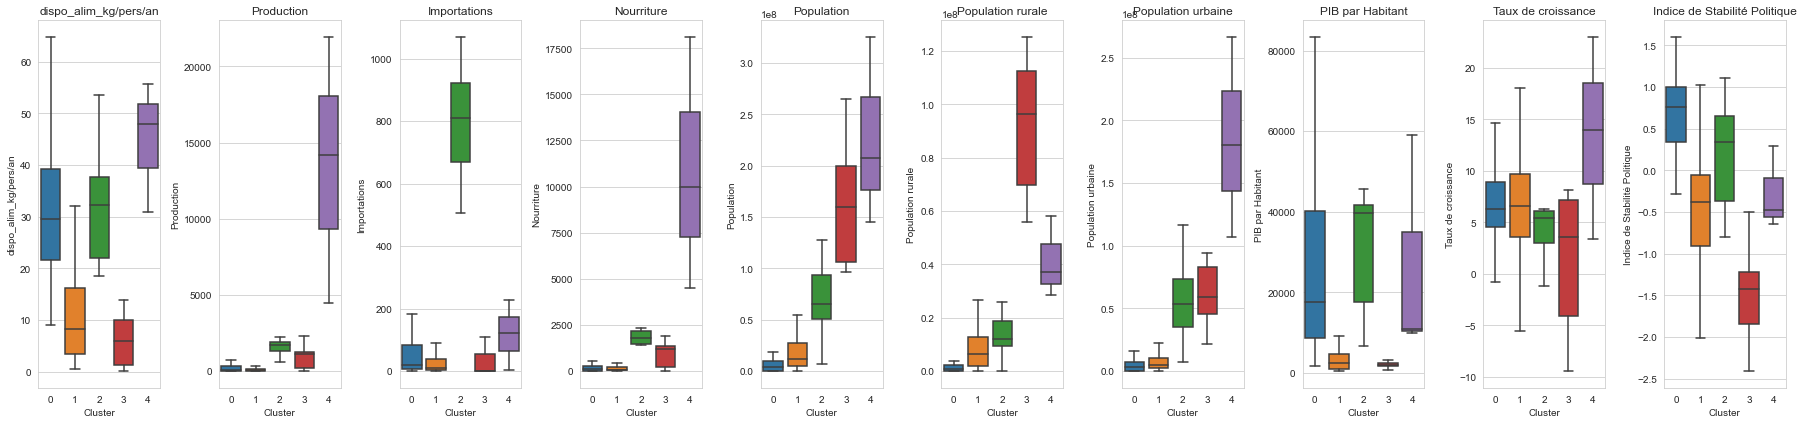

In [9]:
# Afficher les boxplots des caractéristiques des variables pour chaque cluster
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=10, figsize=(25, 6))

for i, col in enumerate(X.columns):
    sns.boxplot(x='Cluster', y=col, data=data_etude, ax=axs[i], showfliers=False)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [10]:
# Afficher les pays par cluster
for i in range(5):
    print(f"Cluster {i}:")
    cluster_pays = data_etude[data_etude['Cluster'] == i]['Zone'].values
    count = len(cluster_pays)
    print(f"{cluster_pays} ({count} pays)\n")

Cluster 0:
['Antigua-et-Barbuda' 'Argentine' 'Australie' 'Autriche' 'Bahamas'
 'Barbade' 'Belgique' 'Belize' 'Bolivie (État plurinational de)'
 'Bulgarie' 'Bélarus' 'Cabo Verde' 'Canada' 'Chili' 'Chine - RAS de Macao'
 'Chypre' 'Costa Rica' 'Cuba' 'Danemark' 'Dominique' 'Espagne' 'Estonie'
 'Fidji' 'Finlande' 'Gabon' 'Grenade' 'Guyana' 'Hongrie' 'Irlande'
 'Islande' 'Israël' 'Italie' 'Jamaïque' 'Kiribati' 'Koweït' 'Lettonie'
 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Norvège'
 'Nouvelle-Zélande' 'Oman' 'Panama' 'Pologne' 'Portugal'
 'République de Corée' 'République dominicaine' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Sainte-Lucie' 'Samoa' 'Slovaquie'
 'Slovénie' 'Suisse' 'Suriname' 'Suède' 'Tchéquie' 'Trinité-et-Tobago'
 'Uruguay' 'Émirats arabes unis'] (62 pays)

Cluster 1:
['Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Arménie' 'Azerbaïdjan'
 'Bosnie-Herzégovine' 'Botswana' 'Burkina Faso' 'Bénin' 'Cambodge'
 'Cameroun' 'Colombie' 'Congo' 'Croatie' "Côte 

Descriptions des clusters en prenant en compte les critères PESTEL :

> **Cluster 0** : 
>Ce cluster regroupe les pays ayant ne grande disponibilité alimentaire par personne et par an, un PIB moyen et un taux de croissance élévé. Son indice de stabilité politique moyen est le plus élevé. Parcontre il a une production de viande de volaille une consommation relativement basses. Il a aussi une Population faible et un niveau d'importation moyennement bas.
>>Cela suggère que **ce cluster est composé de pays relativement riches et stables sur le plan politique**.

> **Cluster 1** : 
>Ce cluster regroupe les pays ayant une faible disponibilité alimentaire par personne et par an, ainsi qu'une faible production de viande de volaille. La population est principalement rurale et l'indice de stabilité politique est relativement faible. Son PIB est faible mais avec un taux de croisssance élevé. 
>>Cela suggère que **ce cluster est composé de pays relativement pauvres et instables sur le plan politique, mais qui connaissent une croissance économique relativement rapide**.

> **Cluster 2** : 
>Ce cluster regroupe les pays ayant une disponibilité alimentaire et une quantité d'importations élevées de viande de volailles. Son indice de stabilité politique est relativement élevé avec un PIB moyen. Sa population est plus urbaine.
>>Cela suggère que **ce cluster est composé de pays relativement riches et stables sur le plan politique**.

> **Cluster 3** : 
>Ce cluster regroupe les pays ayant la plus faible disponibilité alimentaire  et l'indice de stabilité polique le plus faible. La population est principalement rurale et son PIB est relativement bas.
>>Cela suggère que **ce cluster est composé de pays relativement pauvres et instables sur le plan politique, en difficulté économique.**

> **Cluster 4** : 
>Ce cluster regroupe les pays ayant les plus hauts niveaux en terme de disponibilité alimentaire, de production de viande de volaille, de population et de taux de croissance. La population est principalement urbaine et l'indice de stabilité politique est relativement faible.
>>Cela suggère que **ce cluster est composé de pays relativement riches mais un peu instables sur le plan politique, qui connaissent une forte croissance économique**.

> **Les clusters identifiés reflètent les différences économiques et sociales entre les pays**, avec des pays riches et stables politiquement d'un côté, et des pays plus pauvres et instables de l'autre. Ils aident à mieux comprendre les marchés potentiels pour le poulet en prenant en compte les critères PESTEL, tels que l'indice de stabilité politique et le niveau de développement économique des pays.

### Recommandations: 

En prenant en compte les critères PESTEL, les clusters à cibler en priorité dépendent des objectifs et des stratégies de l'entreprise. 

>- Si l'entreprise cherche des **marchés stables et prospères**, le **Cluster 0** serait un choix judicieux, car il est composé de **pays relativement riches et stables** sur le plan politique, avec une **croissance économique rapide et une disponibilité alimentaire élevée**.

>- Si l'entreprise cherche à **s'implanter dans des marchés en développement** avec un potentiel de croissance élevé, le **Cluster 1** pourrait être une **option intéressante**, car il est composé de **pays pauvres mais avec un taux de croissance économique rapide**. Cependant, **il faut prendre en compte l'instabilité politique** qui peut impacter les activités de l'entreprise.

>- Si l'entreprise cherche à accéder à des **marchés avec une forte demande de viande de volaille et une population urbaine importante**, le **Cluster 2** serait un choix judicieux, car il est composé de **pays relativement riches** avec une **forte demande** en viande de volaille et une **population urbaine importante**.

>- Si l'entreprise cherche à s'implanter dans des **marchés difficiles**, avec une demande faible et une forte instabilité politique, **le Cluster 3** serait un choix risqué, car il est composé de **pays pauvres et instables sur le plan politique**, avec une **faible disponibilité alimentaire**.

>- Enfin, si l'entreprise cherche à **s'implanter dans des marchés à haut potentiel de croissance avec une forte demande** de viande de volaille mais avec une **instabilité politique relativement faible**, le **Cluster 4** serait un choix **intéressant**, car il est composé de **pays riches avec une forte croissance** économique et une **forte demande** de viande de volaille, mais avec une instabilité politique à prendre en compte.

 ### <a id="B3">3. Comparer les résultats des deux méthodes de clustering</a>

Comparaison des deux méthodes de clustering :
Cluster 0 : K-Means -> 62 pays; CAH -> 91 pays
Cluster 1 : K-Means -> 82 pays; CAH -> 2 pays
Cluster 2 : K-Means -> 8 pays; CAH -> 57 pays
Cluster 3 : K-Means -> 7 pays; CAH -> 7 pays
Cluster 4 : K-Means -> 3 pays; CAH -> 5 pays


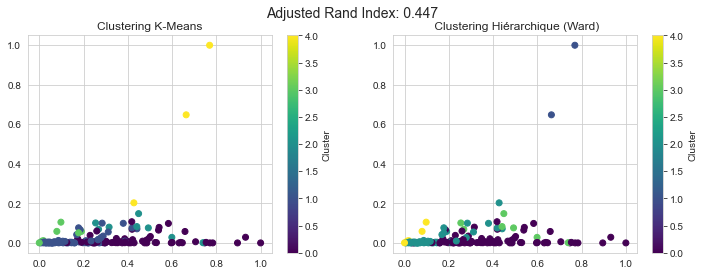

In [11]:
from sklearn.metrics import adjusted_rand_score

# Clustering K-Means 
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Clustering Hiérarchique
cah = AgglomerativeClustering(n_clusters=5, linkage='ward')
cah_labels = cah.fit_predict(X_scaled)

# Nombre de pays par cluster pour K-Means
kmeans_counts = np.bincount(kmeans_labels)

# Nombre de pays par cluster pour la CAH
cah_counts = np.bincount(cah_labels)

# Comparaison des deux méthodes de clustering
print("Comparaison des deux méthodes de clustering :")
for i in range(len(kmeans_counts)):
    print(f"Cluster {i} : K-Means -> {kmeans_counts[i]} pays; CAH -> {cah_counts[i]} pays")

# Calcul de l'indice de rang ajusté ARI (Adjusted Rand Index)
ari = adjusted_rand_score(kmeans_labels, cah_labels)

# Affichage des résultats
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Clustering K-Means')
plt.colorbar(label='Cluster')

plt.subplot(122)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cah_labels, cmap='viridis')
plt.title(' Clustering Hiérarchique (Ward)')
plt.colorbar(label='Cluster')
plt.suptitle(f'Adjusted Rand Index: {ari:.3f}', fontsize=14)
plt.show()

>- Les résultats montrent que les deux méthodes de clustering ont réussi à identifier deux clusters différents dans les données.
>- L'indice de rang ajusté (ARI) de **0,447**  suggère une correspondance modérée entre les deux méthodes de clustering. Cela signifie que les clusters obtenus par K-Means et par CAH ont une certaine similarité mais aussi des différences significatives.

### <a id="B4">4. Analyse des centroïdes des classes</a>
> **L'analyse des centroïdes** est utile pour identifier les **pays les plus similaires** en termes de caractéristiques **économiques, sociales et de consommation**, ainsi que les opportunités de marché potentielles.

In [12]:
# Clustering avec KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Calcul des centroïdes pour les cinq clusters
centroids = kmeans.cluster_centers_

# Création d'un dataframe pour les centroïdes
centroids_df = pd.DataFrame(data=centroids, columns=X_cols)
centroids_df

,dispo_alim_kg/pers/an,Production,Importations,Nourriture,Population,Population rurale,Population urbaine,PIB par Habitant,Taux de croissance,Indice de Stabilité Politique
0,0.447812,0.014128,0.056323,0.014913,0.027836,0.016186,0.026439,0.236517,0.587902,0.796540
1,0.141185,0.010717,0.036517,0.012572,0.059489,0.078577,0.036471,0.027618,0.592498,0.530327
2,0.444808,0.073292,0.737956,0.106966,0.216713,0.104083,0.217174,0.277114,0.565769,0.688326
3,0.082354,0.041956,0.048510,0.049437,0.496990,0.732851,0.258372,0.015519,0.452650,0.318439
4,0.620209,0.616942,0.109760,0.600158,0.695615,0.329786,0.693393,0.238443,0.699787,0.587372


- ### Visualisation des Centroïdes en 2D  et 3D

Matrice de Corrélation:


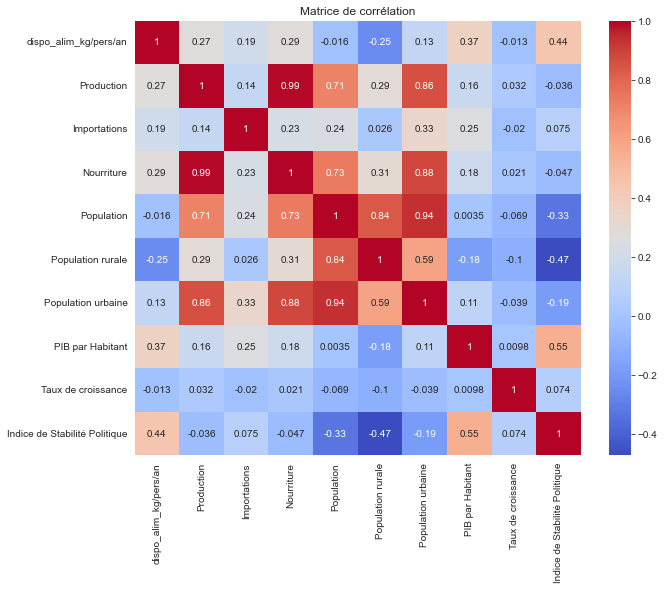

In [13]:
# Calcul de la matrice de corrélation

print('Matrice de Corrélation:')
corr_matrix = np.corrcoef(X_scaled.T)

# Création d'un DataFrame à partir de la matrice de corrélation
corr_df = pd.DataFrame(corr_matrix, columns=X_cols, index=X_cols)

# Affichage de la matrice de corrélation avec les noms des variables
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

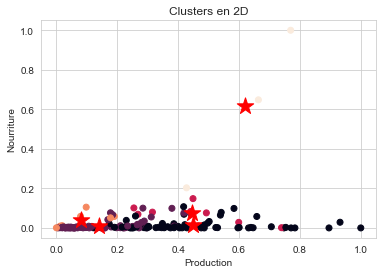

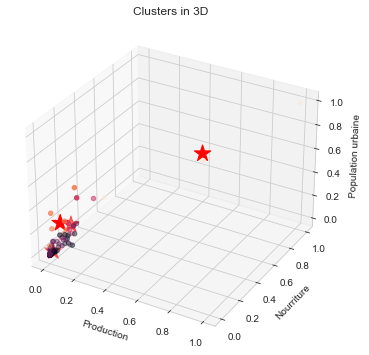

In [14]:
# Visualisation des Graphiques
from mpl_toolkits.mplot3d import Axes3D

# Centroides des 5 clusters
centroids = centroids_df.values

# Graphique en 2D : Centroïdes des clusters en fonction de la Production et la Nourriture
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title('Clusters en 2D')
plt.xlabel('Production')
plt.ylabel('Nourriture')
plt.show()

# Graphique en 3D : Centroïdes des clusters en fonction de la Production et la Nourriture et du Population urbaine
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 1], X_scaled[:, 3], X_scaled[:, 6], c=labels)
ax.scatter(centroids[:, 1], centroids[:, 3], centroids[:, 6], marker='*', s=300, c='r')
ax.set_xlabel('Production')
ax.set_ylabel('Nourriture')
ax.set_zlabel('Population urbaine')
plt.title('Clusters in 3D')
plt.show()

### Observations et Recommandations:

En se basant sur les résultats des clusters et des centroïdes, voici quelques conclusions pertinentes sur les caractéristiques des clusters :

>- **Cluster 0** : Ce cluster se caractérise par une faible disponibilité alimentaire par personne et une faible production. Les importations sont également relativement faibles. La population est principalement rurale et le taux de croissance est élevé. Cela peut indiquer **des pays en développement** où l'industrie avicole est encore en développement et pourrait représenter une **opportunité d'exportation de poulets pour répondre à la demande croissante**.

>- **Cluster 1** : Ce cluster se distingue par une disponibilité alimentaire relativement faible, une production modérée et des importations limitées. La population est principalement urbaine et le PIB par habitant est faible. Ces **pays pourraient nécessiter des importations de produits agroalimentaires pour répondre à la demande urbaine croissante**.

>- **Cluster 2** : Ce cluster présente une disponibilité alimentaire élevée par personne, une production importante et des importations significatives. La population est répartie entre les zones rurales et urbaines. **Le PIB par habitant est relativement élevé**, ce qui indique une meilleure capacité d'achat. **Ces pays pourraient représenter des marchés potentiels pour l'exportation de poulets de haute qualité**.

>- **Cluster 3** : Ce cluster se caractérise par une disponibilité alimentaire modérée, une production et des importations relativement faibles. La population est principalement rurale et le taux de croissance est bas. **Ces pays pourraient nécessiter des efforts supplémentaires pour développer leur industrie avicole et pourraient présenter des opportunités limitées pour l'exportation de poulets**.

>- **Cluster 4** : Ce cluster se distingue par une disponibilité alimentaire élevée par personne, une forte production et des importations limitées. La population est répartie entre les zones rurales et urbaines, et le PIB par habitant est élevé. **Ces pays pourraient être des marchés prometteurs pour l'exportation de poulets de qualité supérieure**.


>En conclusion, parmi les 5 clusters obtenus, **les deux groupes les plus pertinents** pour notre objectif d'exporter des poulets sont les **clusters 2 et 4**. Ces deux groupes se distinguent par leur potentiel économique, leur niveau de développement et leur demande croissante de produits alimentaires, ce qui en fait des **marchés cibles attractifs pour nos poulets**. En nous concentrant sur ces groupes, nous pourrons **maximiser nos efforts d'exportation en capitalisant sur les opportunités commerciales existantes et en répondant aux besoins spécifiques de ces marchés**.

### <a id="B5">5. Réaliser une ACP pour comprendre les groupes, les liens entre les variables et les liens entre les pays</a>

> L'Analyse en Composantes Principales (ACP) est une méthode d'analyse multivariée qui permet de réduire la dimensionnalité des données en projetant les variables dans un espace de dimension inférieure, tout en conservant un maximum d'informations. Dans notre cas, elle permet de visualiser les relations entre les variables et les pays, en explorant la structure des données pour en extraire les informations principales.

Composante 1: 4.091170568259372 (40.66% variance expliquée, 40.66% variance cumulée)
Composante 2: 2.327641080680319 (23.13% variance expliquée, 63.79% variance cumulée)
Composante 3: 1.0503964269594703 (10.44% variance expliquée, 74.23% variance cumulée)
Composante 4: 0.9163992463179101 (9.11% variance expliquée, 83.34% variance cumulée)
Composante 5: 0.7210614065774503 (7.17% variance expliquée, 90.50% variance cumulée)
Composante 6: 0.5263950958885245 (5.23% variance expliquée, 95.74% variance cumulée)
Composante 7: 0.35964486367933907 (3.57% variance expliquée, 99.31% variance cumulée)
Composante 8: 0.06276552937594167 (0.62% variance expliquée, 99.93% variance cumulée)
Composante 9: 0.006336276834503372 (0.06% variance expliquée, 100.00% variance cumulée)
Composante 10: 0.0003013066693979958 (0.00% variance expliquée, 100.00% variance cumulée)
Nombre de composantes principales à retenir : 3


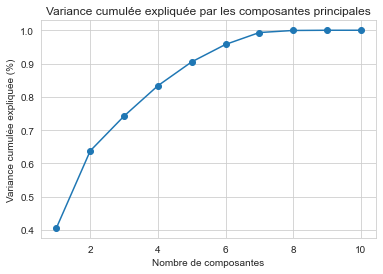

In [15]:
# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcul de la matrice de covariance
cov_matrix = np.cov(X_scaled.T)

# Calcul des valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Trier les valeurs propres de manière décroissante
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calcul du pourcentage de variance expliquée
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance

# Affichage des valeurs propres et pourcentages cumulés
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

for i, value in enumerate(sorted_eigenvalues):
    print(f"Composante {i+1}: {value} ({explained_variance_ratio[i]*100:.2f}% variance expliquée, {cumulative_variance_ratio[i]*100:.2f}% variance cumulée)")

# Calcul du nombre de composantes principales à retenir (critère du coude)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.70) + 1

print(f"Nombre de composantes principales à retenir : {n_components}")

# Visualisation de la variance cumulée expliquée
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance cumulée expliquée (%)')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.show()

> Nous retenons les **composantes 1, 2 et 3** qui expliquent ensemble **74.23%** de la variance totale. Ces trois composantes contiennent une **grande partie de l'information des variables d'origine** et nous permettront de **réduire la dimensionnalité** de nos données tout en **conservant une quantité significative de variance**.

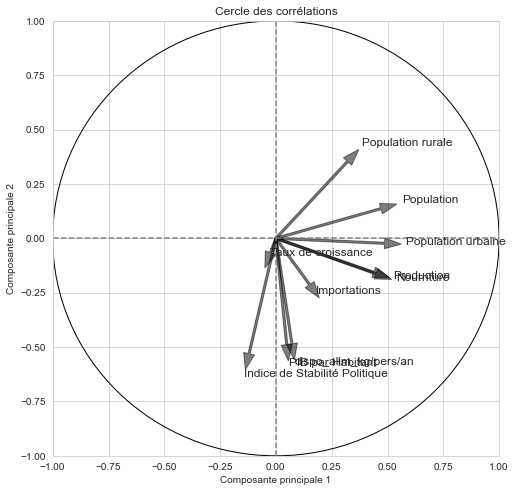

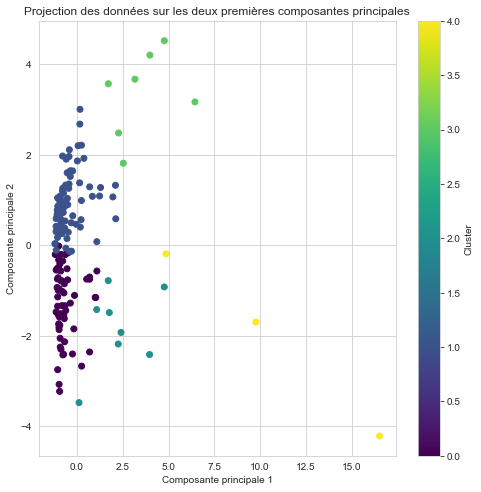

In [16]:
# Calculer les caractéristiques principales
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Créer un DataFrame pour les composantes principales
principal_df = pd.DataFrame(data=principal_components, columns=['Composante 1', 'Composante 2', 'Composante 3'], index=data_etude['Zone'])

# Cercle des corrélations
plt.figure(figsize=(8,8))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axvline(x=0, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
circle = plt.Circle((0,0), 1, color='black', fill=False)
plt.gca().add_artist(circle)
for i, var in enumerate(X):
    x = pca.components_[0, i]
    y = pca.components_[1, i]
    plt.arrow(0, 0, x, y, color='black', alpha=0.5, width=0.01, head_width=0.05)
    plt.text(x*1.2, y*1.2, var, fontsize=12)
plt.title('Cercle des corrélations')
plt.show()

# Définir une palette de couleur personnalisée
cmap = plt.cm.get_cmap('viridis')

# Projection des données sur les deux premières composantes principales avec couleur en fonction des clusters
plt.figure(figsize=(8, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap=cmap)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.colorbar(label='Cluster')
plt.show()

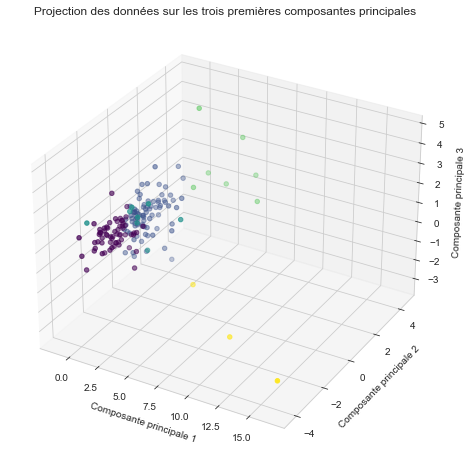

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Projection des données sur les trois premières composantes principales
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=labels, cmap=cmap)
ax.set_xlabel('Composante principale 1')
ax.set_ylabel('Composante principale 2')
ax.set_zlabel('Composante principale 3')
ax.set_title('Projection des données sur les trois premières composantes principales')
plt.show()

In [18]:
# Calculer les charges factorielles
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Créer un DataFrame pour les charges factorielles
loadings_df = pd.DataFrame(loadings, columns=['Composante 1', 'Composante 2', 'Composante 3'], index=X.columns)

# Afficher les variables les plus influentes pour chaque composante principale
for i in range(pca.n_components_):
    print(f"Composante {i+1}:")
    print(loadings_df.iloc[:, i].sort_values(ascending=False).head(3))
    print()

Composante 1:
Population urbaine    0.984679
Population            0.951481
Nourriture            0.907400
Name: Composante 1, dtype: float64

Composante 2:
Population rurale     0.539609
Population            0.208709
Population urbaine   -0.034950
Name: Composante 2, dtype: float64

Composante 3:
Importations         0.404419
PIB par Habitant     0.173851
Population rurale    0.146554
Name: Composante 3, dtype: float64



### Observations et Recommandations : 

Les variables qui ont le plus d'influence sur chaque composante principale de l'ACP sont les suivantes :

- **Composante 1**: La variation de la population urbaine, de la population totale et de la disponibilité alimentaire. 
>On peut donc interpréter la **Composante 1** comme le **Niveau d'urbanisation et disponibilité alimentaire**.

- **Composante 2**: La variation de la **population rurale**, de la **population totale** et de la population **urbaine**. La direction de **l'influence de la population urbaine est négative**, ce qui signifie qu'une **augmentation de la population urbaine** est associée à une **diminution de la valeur de la Composante 2**.
>On peut donc interpréter la **Composante 2** comme la **Répartition de la population entre zones rurales et urbaines**.

- **Composante 3**: Les variations des **importations**, du **PIB par habitant** et de la **population rurale**.
>On peut donc interpréter la **Composante 3** comme les **Importations et richesse économique**.